In [510]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [511]:
Patm = 101325.0
V0 = 0.008
P0 = 500000
gamma = 1.4
A = 0.0004
rho = 1000
M = 1
m0 = 10
Ar = 0.004
Cd = 0.5
rhoa = 1.29
g = 10

In [512]:
u0 = np.sqrt(2 * (P0 - Patm) / rho)
u0

28.237386564623858

In [513]:
def f(u, t):
    return -gamma*P0*(V0**gamma)*A/rho*((1/2*rho*u**2+Patm)/(P0*V0**gamma))**((gamma+1)/gamma)

In [514]:
ti = 0
tf = 5
t = np.arange(ti, tf, 0.001)
u = odeint(f, u0, t)

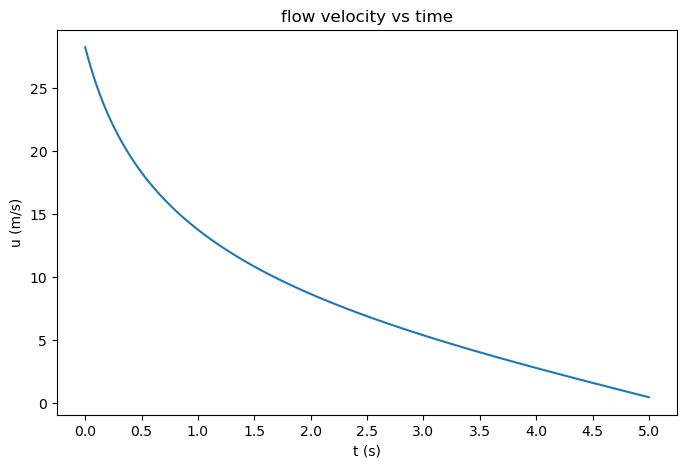

In [515]:
plt.figure(figsize=(8, 5))
plt.title("flow velocity vs time")
plt.plot(t, u)
plt.xlabel("t (s)")
plt.ylabel("u (m/s)")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.yticks(np.arange(0, 30, 5))
plt.show()

In [516]:
from scipy.optimize import curve_fit

In [517]:
def model(t, k, a, b, m):
    return (u0*np.exp(-k*t) + u0 / (1 + np.power(t/a, b))) / 2 - m * np.log(1 + t)

In [518]:
coeffs, _ = curve_fit(model, t, u[:,0])

C:\Users\17024\AppData\Local\Temp\ipykernel_3696\2940829511.py:2: RuntimeWarning: divide by zero encountered in power
  return (u0*np.exp(-k*t) + u0 / (1 + np.power(t/a, b))) / 2 - m * np.log(1 + t)


In [519]:
coeffs

array([0.1025887 , 0.4777556 , 1.01666801, 5.0401066 ])

In [520]:
def u_approx(t):
    return 14.12 * (np.exp(-0.1 * t) + 1 / (1 + 2 * t)) - 5 * np.log(1 + t)

In [521]:
fit = [u_approx(i) for i in t]

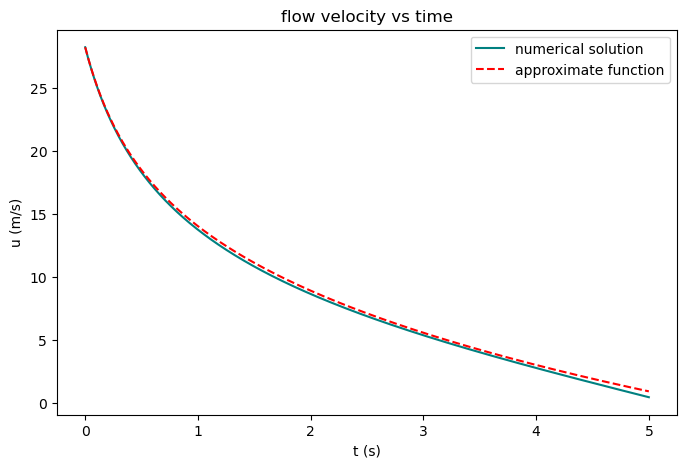

In [522]:
plt.figure(figsize=(8, 5))
plt.plot(t, u, color="teal", label='numerical solution')
# plt.plot(t, model(t, *coeffs), 'r--', label='function fit')
plt.plot(t, fit, 'r--', label='approximate function')
plt.title("flow velocity vs time")
plt.xlabel("t (s)")
plt.ylabel("u (m/s)")
plt.legend(loc='best')


In [523]:
def m(t):
    return 28.24 * (-20 * np.exp(-0.1 * t) - np.log(1 + 2 * t)) - 20 * (1+t) * np.log(1+t) + 575

In [524]:
mass = [m(i) for i in t if m(i) > 0]
len(mass)


2161

Text(0, 0.5, 'm (kg)')

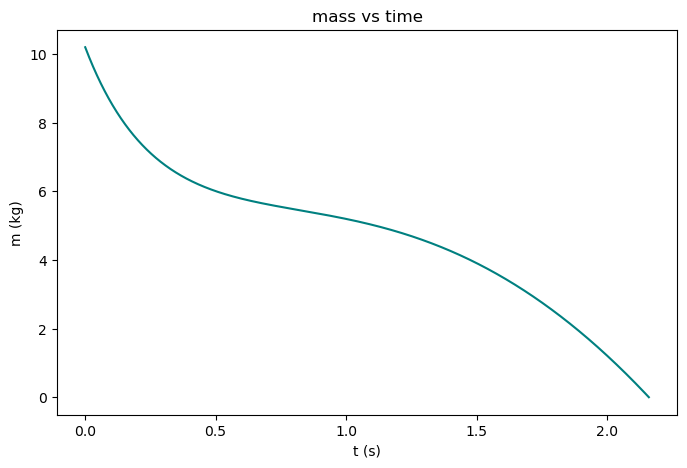

In [525]:
plt.figure(figsize=(8, 5))
plt.plot(t[:len(mass)], mass, color="teal")
plt.title("mass vs time")
plt.xlabel("t (s)")
plt.ylabel("m (kg)")
# plt.ylim(0, 10)

In [526]:
def f(v, t):
    return (A * rho * u_approx(t) * u_approx(t) - g * (m(t) + M) - 0.5 * rhoa * Ar * Cd * v * v) / (m(t) + M)

In [527]:
ti = 0
tf = t[len(mass)-1]
t = np.arange(ti, tf, 0.001)
v = odeint(f, 0, t)

Text(0, 0.5, 'v (m/s)')

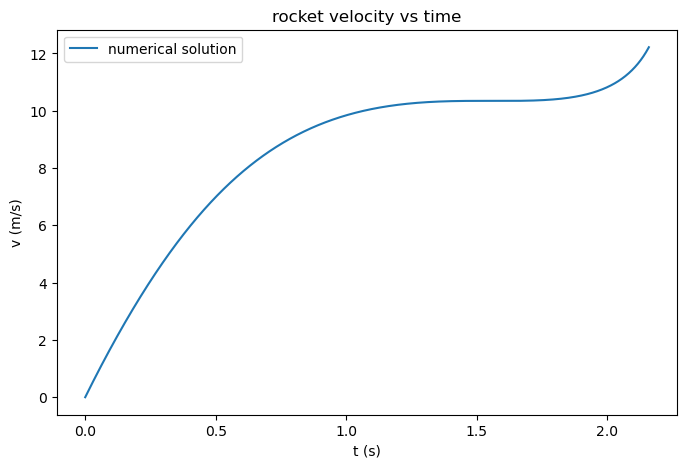

In [528]:
plt.figure(figsize=(8, 5))
plt.plot(t, v, label='numerical solution')
plt.legend(loc='best')
plt.title("rocket velocity vs time")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")


In [529]:
max(v[:,0])

12.215361027110841